In [10]:
#import the necessary libraries

import numpy as np 
import matplotlib.pyplot as plt
import json
import pandas as pd
import os
import sys
from numpy.linalg import matrix_power
module_path = os.path.abspath(os.path.join('../../src/analytic/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import analytic  as ac


# Intro plot

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.]


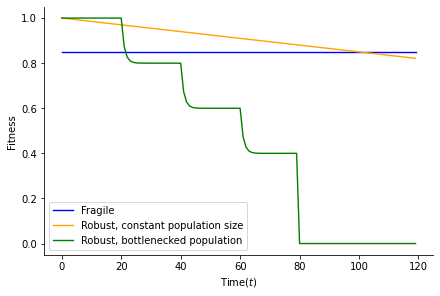

In [2]:
l = lambda l,t,r: True if l<=t<r else False
t = np.arange(0,120,1.)
print(t)
W1 = 0.85
W2 = 1-0.0015*t 

W3 = np.piecewise(t, [t<20., [l(20,t_i,40) for t_i in t], [l(40,t_i,60) for t_i in t], [l(60,t_i,80) for t_i in t]], [lambda t: 1., lambda t: 0.8+0.2*np.exp(-t+20), lambda t: 0.6+0.2*np.exp(-t+40),
                                                         lambda t: 0.4+0.2*np.exp(-t+60) ])


figure = plt.figure(constrained_layout=True, figsize=(6,4))
gs = figure.add_gridspec(nrows=1, ncols=1, left=0.05, right=0.48, wspace=0.05)

ax = figure.add_subplot(gs[0,0])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.plot(t,np.ones(len(t))*W1,color="blue", label="Fragile",linewidth=1.4)
plt.plot(t,W2, color="orange", label="Robust, constant population size",linewidth=1.4)
plt.plot(t,W3, color="green", label='Robust, bottlenecked population',linewidth=1.4)
plt.legend()
plt.xlabel(r"Time($t$)")
plt.ylabel("Fitness")

plt.savefig('../../images/analytical/intro.pdf')
plt.show()

# 2. The expected asymptotic population mean fitness

In [4]:
sb = 0.2 
u = 0.1
sd_range= list(np.arange(0.01,0.5,0.0001))
asympto_fit = []
condasympto_fit = []
for sd in sd_range : 
    kk = ac.K(sb,sd,u) + 1 
    n = np.zeros(kk, dtype=int)
    n[0]=1
    #print(n, kk)
    asympto_fit.append(ac.asymptoticmean_fitness(sb,sd,u,n))
    condasympto_fit.append(ac.conditasymptoticmean_fitness(sb,sd,u,n))

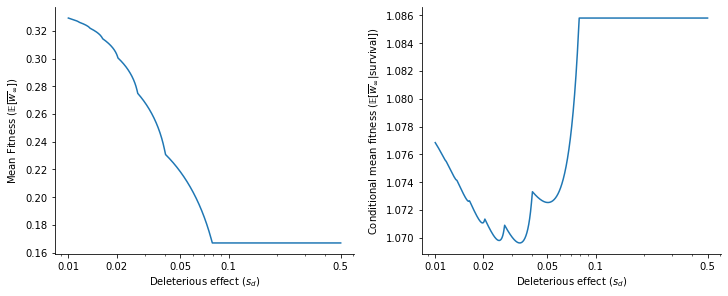

In [6]:
figure = plt.figure(constrained_layout=True, figsize=(10,4))
gs = figure.add_gridspec(nrows=1, ncols=2, left=0.05, right=0.48, wspace=0.05)
ax = figure.add_subplot(gs[0,0])
plt.xscale('log')

labels = [0.01,0.02,0.05,0.10,0.5]
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.plot(sd_range,asympto_fit)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

plt.xlabel(r'Deleterious effect ($s_d$)')
plt.ylabel(r'Mean Fitness ($\mathrm{\mathbb{E}}{[\overline{w}_{\infty}]}$)')

ax = figure.add_subplot(gs[0,1])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xscale('log')
labels = [0.01,0.02,0.05,0.10,0.5]
ax.set_xticks(labels)
ax.set_xticklabels(labels)
ax.plot(sd_range,condasympto_fit)
plt.xlabel(r'Deleterious effect ($s_d$)')
plt.ylabel(r'Conditional mean fitness ($\mathrm{\mathbb{E}}{[\overline{w}_{\infty}|\mathrm{survival}]}$)')

plt.savefig('../../images/analytical/asymptotic_fitness.pdf')
plt.show()

# 3. Survival Prob after b bottlenecks of size B

In [8]:
sb = .2 
u = 0.05 
B = 5
result = []
for sd in np.arange(0.03,1,0.01): 
    print("compute for sd =", sd, 'K = ',ac.K(sb, sd, u))
    m = ac.bottleneckTransitionMat(sb,sd,u,B)
    result.append(m)

compute for sd = 0.03 K =  4
compute for sd = 0.04 K =  3
compute for sd = 0.05 K =  2
compute for sd = 0.060000000000000005 K =  2
compute for sd = 0.07 K =  1
compute for sd = 0.08000000000000002 K =  1
compute for sd = 0.09000000000000001 K =  1
compute for sd = 0.1 K =  1
compute for sd = 0.11000000000000001 K =  1
compute for sd = 0.12000000000000002 K =  1
compute for sd = 0.13 K =  0
compute for sd = 0.14 K =  0
compute for sd = 0.15000000000000002 K =  0
compute for sd = 0.16000000000000003 K =  0
compute for sd = 0.17 K =  0
compute for sd = 0.18000000000000002 K =  0
compute for sd = 0.19000000000000003 K =  0
compute for sd = 0.20000000000000004 K =  0
compute for sd = 0.21000000000000005 K =  0
compute for sd = 0.22000000000000003 K =  0
compute for sd = 0.23000000000000004 K =  0
compute for sd = 0.24000000000000005 K =  0
compute for sd = 0.25 K =  0
compute for sd = 0.26 K =  0
compute for sd = 0.27 K =  0
compute for sd = 0.28 K =  0
compute for sd = 0.29000000000000004

In [12]:
analytical = []

for i in range(1,6) : 
    
    p_surv5 = []
    print(i)
    for M in result:
        m_ext = matrix_power(M,i)
        p_surv5.append(1.- m_ext[-1,0])
    analytical.append(p_surv5)
Ks = []
for sd in np.arange(0.03,1,0.01): 
    print("compute for sd =", sd, 'K = ',ac.K(sb, sd, u))
    Ks.append(r'$'+str(ac.K(sb, sd, u))+'$')

Ks = [r'$2$',r'$1$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$',r'$0$']

xy = [(np.arange(0.05,1.,0.05)[i],analytical[0][i]) for i in range(len(np.arange(0.05,1.,0.05)))]

len(Ks), len(np.arange(0.05,1.,0.05)), len(xy)

1
2
3
4
5
compute for sd = 0.03 K =  4
compute for sd = 0.04 K =  3
compute for sd = 0.05 K =  2
compute for sd = 0.060000000000000005 K =  2
compute for sd = 0.07 K =  1
compute for sd = 0.08000000000000002 K =  1
compute for sd = 0.09000000000000001 K =  1
compute for sd = 0.1 K =  1
compute for sd = 0.11000000000000001 K =  1
compute for sd = 0.12000000000000002 K =  1
compute for sd = 0.13 K =  0
compute for sd = 0.14 K =  0
compute for sd = 0.15000000000000002 K =  0
compute for sd = 0.16000000000000003 K =  0
compute for sd = 0.17 K =  0
compute for sd = 0.18000000000000002 K =  0
compute for sd = 0.19000000000000003 K =  0
compute for sd = 0.20000000000000004 K =  0
compute for sd = 0.21000000000000005 K =  0
compute for sd = 0.22000000000000003 K =  0
compute for sd = 0.23000000000000004 K =  0
compute for sd = 0.24000000000000005 K =  0
compute for sd = 0.25 K =  0
compute for sd = 0.26 K =  0
compute for sd = 0.27 K =  0
compute for sd = 0.28 K =  0
compute for sd = 0.2900000

(19, 19, 19)

<ipython-input-17-60363a10c604>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().spines["right"].set_visible(False)


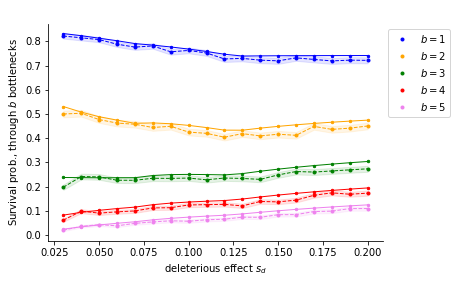

In [17]:
surv = pd.read_csv('../../data/bp/survProb.csv')
    
standard_dev = []
standard_dev2 = []

for i in range(1,6): 
    
    X = [analytical[i-1][:len(surv[str(i)])], surv[str(i)]]
    standard_dev.append(np.std(surv[str(i)]))
    
    standard_dev2.append(1.96*np.sqrt(np.array(surv[str(i)])*(1.-np.array(surv[str(i)]))/5000.))

colors = ['blue', 'orange', 'green', 'red', 'violet']
box_probs = []
sd_s = np.arange(0.03,.21,0.01)
#plt.yscale('log')
plt.axes().spines["top"].set_visible(False)
plt.axes().spines["right"].set_visible(False)
for b in range(1,6):
    for i in range(len(sd_s)) : 
        plt.annotate(Ks[i], (sd_s[i],0.9))
    plt.plot(sd_s,analytical[b-1][:len(sd_s)], 'o-',color=colors[b-1], ms=2.4, linewidth=1., )
    plt.plot(sd_s,surv[str(b)], 'o--', label=r'$b='+str(b)+'$', ms=3., linewidth=1., color=colors[b-1])
    plt.fill_between(sd_s, (np.array(surv[str(b)])-standard_dev2[b-1]), (np.array(surv[str(b)])+standard_dev2[b-1]), color=colors[b-1], alpha=.1)
    
    
#plt.title(r'Number of supercritical mutations $K$') 
plt.ylabel('Survival prob., through $b$ bottlenecks')
plt.xlabel(r'deleterious effect $s_d$')
leg = plt.legend(bbox_to_anchor=(1., 1.0))
for i in range(len(colors)) : 
    leg.legendHandles[i].set_color(colors[i])
    leg.legendHandles[i].set_linestyle('-')
    leg.legendHandles[i].set_linewidth(0.0)
    
plt.savefig('../../images/analytical/survProb.pdf',bbox_inches='tight')
plt.show()